# Matrice de corrélation

La matrice de données comporte beaucoup de données manquantes : quelle option faut-il utiliser dans la commande cor pour calculer la matrice de corrélation ?
--> use="pairwise.complete.obs"

Dans la commande "cor" permettant de calculer la matrice de corrélation entre plusieurs variables, quel est l’effet de l’option use="complete.obs" ?
--> Les observations comportant au moins une donnée manquante parmi toutes les variables sont retirées du calcul de la corrélation entre deux variables

Dans la commande "cor" permettant de calculer la matrice de corrélation entre plusieurs variables, quelle est l’utilité de l’option use="pairwise.complete.obs" ?
--> Seules les observations comportant au moins une donnée manquante parmi les deux variables considérées dans le calcul de la corrélation sont retirées du calcul de la corrélation

In [2]:
data = read.csv2('../data//smp1.csv')
str(data)

'data.frame':	799 obs. of  9 variables:
 $ age      : int  31 49 50 47 23 34 24 52 42 45 ...
 $ prof     : Factor w/ 8 levels "agriculteur",..: 3 NA 7 6 8 6 3 2 6 6 ...
 $ dep.cons : int  0 0 0 0 1 0 1 0 1 0 ...
 $ scz.cons : int  0 0 0 0 0 0 0 0 0 0 ...
 $ grav.cons: int  1 2 2 1 2 1 5 1 5 5 ...
 $ n.enfant : int  2 7 2 0 1 3 5 2 1 2 ...
 $ rs       : int  2 2 2 2 2 1 3 2 3 2 ...
 $ ed       : int  1 2 3 2 2 2 3 2 3 2 ...
 $ dr       : int  1 1 2 2 2 1 2 2 1 2 ...


In [3]:
var = c('age', 'n.enfant', 'scz.cons', 'dep.cons', 'grav.cons', 'rs', 'ed', 'dr')
round(cor(data[, var], use="complete.obs"), digits=3)

,age,n.enfant,scz.cons,dep.cons,grav.cons,rs,ed,dr
age,1.000,0.441,-0.044,-0.110,-0.139,-0.223,-0.038,0.003
n.enfant,0.441,1.000,0.003,0.002,-0.055,-0.126,0.011,0.015
scz.cons,-0.044,0.003,1.000,0.064,0.290,0.021,0.077,-0.009
dep.cons,-0.110,0.002,0.064,1.000,0.439,0.107,0.259,0.093
grav.cons,-0.139,-0.055,0.290,0.439,1.000,0.151,0.234,0.001
rs,-0.223,-0.126,0.021,0.107,0.151,1.000,0.093,0.088
ed,-0.038,0.011,0.077,0.259,0.234,0.093,1.000,0.115
dr,0.003,0.015,-0.009,0.093,0.001,0.088,0.115,1.000


In [5]:
install.packages("corrplot", repos='http://cran.us.r-project.org')
library(corrplot)

Installing package into 'C:/R/library'
(as 'lib' is unspecified)


package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sébastien\AppData\Local\Temp\RtmpysbPLg\downloaded_packages


corrplot 0.84 loaded


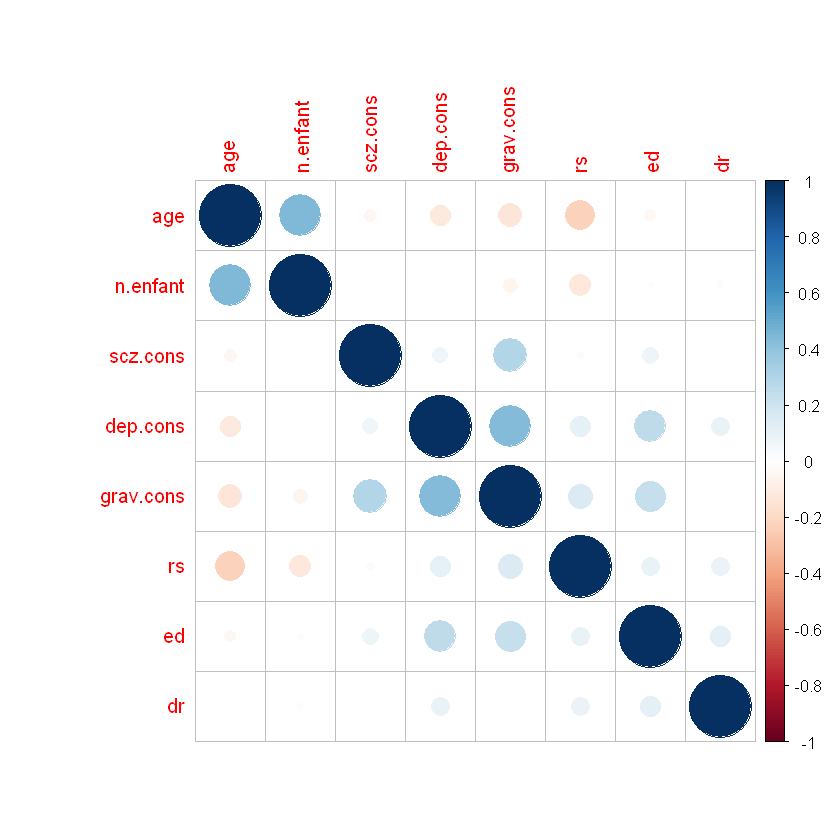

In [6]:
corrplot(cor(data[, var], use="complete.obs"), method="circle")

# PCA

A partir d'une matrice de correlation, il est possible de calculer
$$ d = \sqrt{2(1-r)} $$
les distances allant de 0 à 2.
1. Si r est voisin de 1 alors d est voisin de 0 = correlation importante <-> proximité des points projetés SEULEMENT si proche du bord de la sphère principale.
2. Si d est voisin de 2 alors r est voision de -1 = points dimaétralement opposés et proche du bord.
3. Si d est voision de $\sqrt{2}$ alors r est voisin de 0 = pas de corrélation pour des points séparés par un angle droit.

Attention, les points projetés vers le centre ne sont pas interprétables...

In [7]:
str(var)

 chr [1:8] "age" "n.enfant" "scz.cons" "dep.cons" "grav.cons" "rs" "ed" ...


In [9]:
install.packages("psy", repos='http://cran.us.r-project.org')
library(psy)

Installing package into 'C:/R/library'
(as 'lib' is unspecified)


package 'psy' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sébastien\AppData\Local\Temp\RtmpysbPLg\downloaded_packages


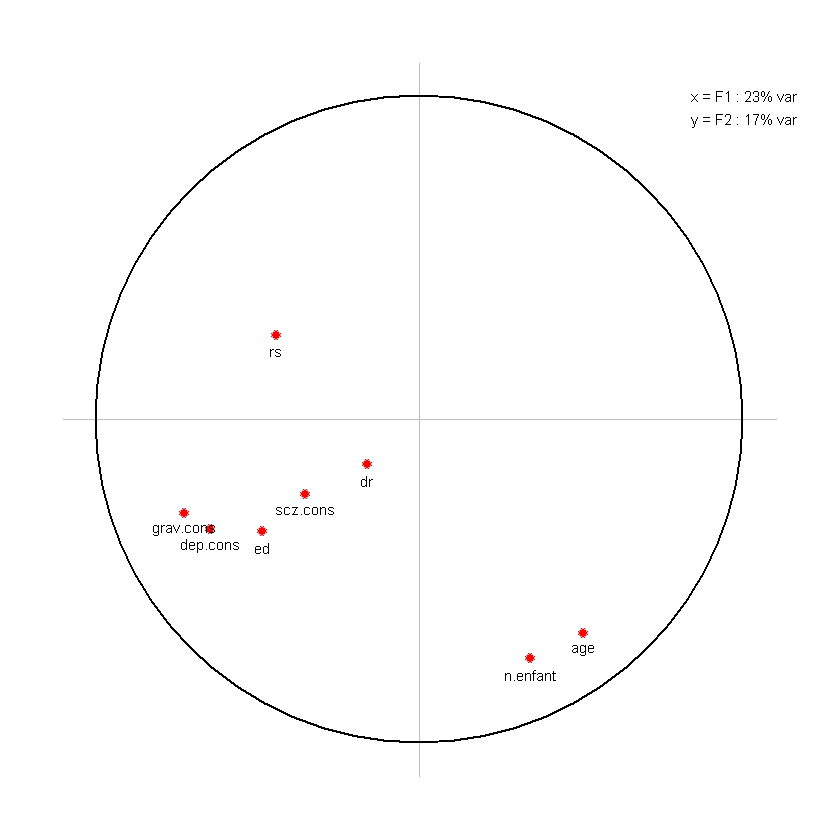

In [16]:
mdspca(data[, var])
# F1 + F2 = 40% variance expliquée
# ATTENTION no stat inference possible...

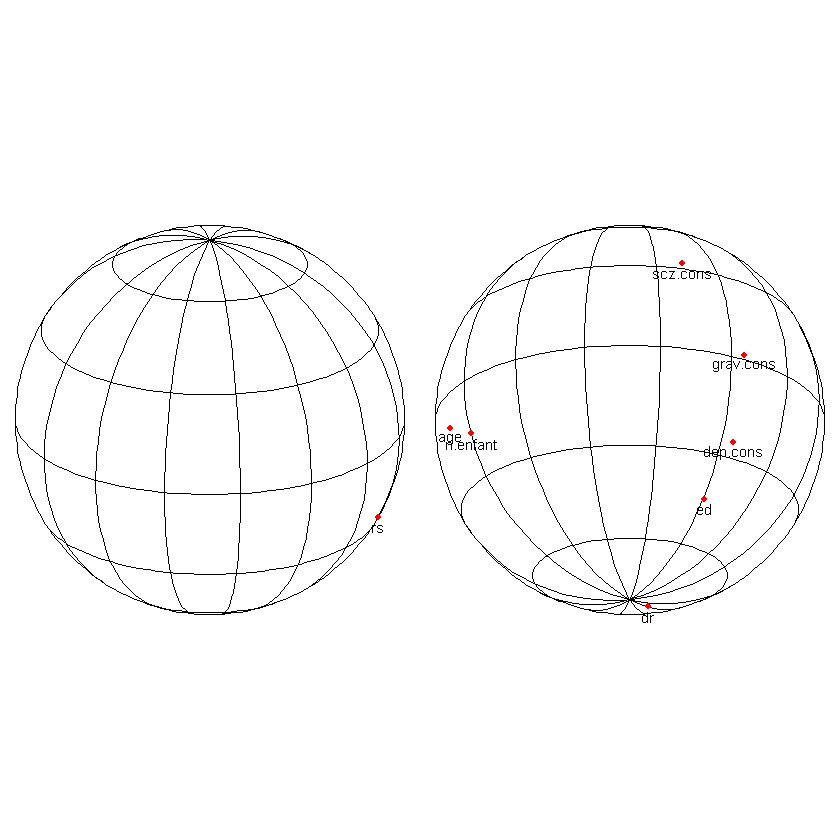

In [14]:
sphpca(data[,var], v=60) # rotation

Une ACP focalisée est utile si l’on dispose d’une variable à expliquer et des plusieurs variables explicatives Une ACP focalisée est utile si l’on dispose d’une variable à expliquer et des plusieurs variables explicatives.

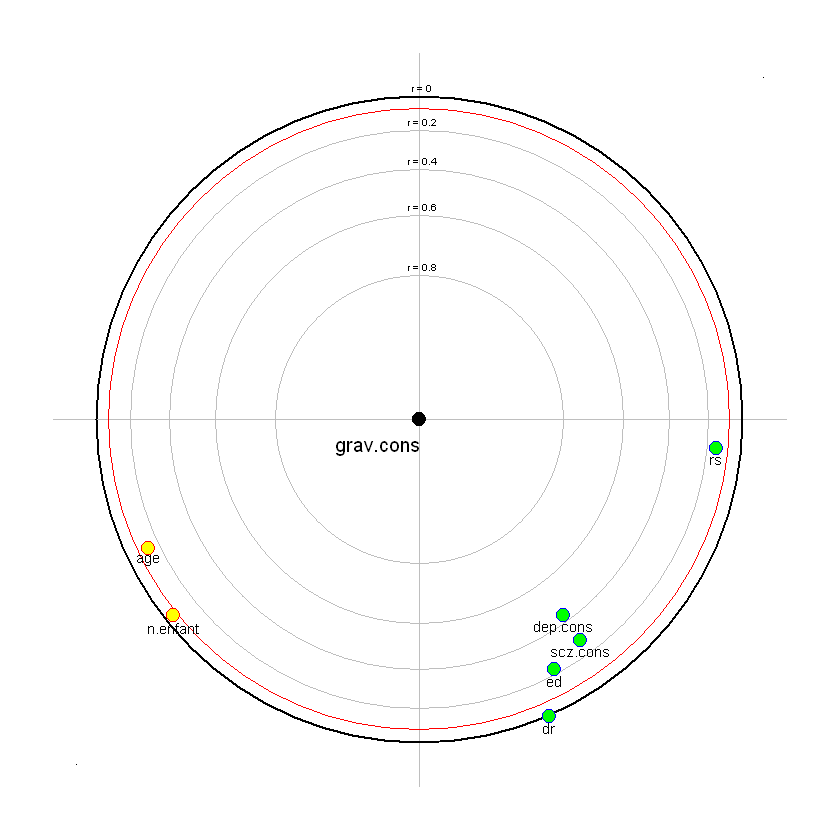

In [17]:
expliquer = 'grav.cons'
explicatives = c('age', 'n.enfant', 'dep.cons', 'scz.cons', 'rs', 'ed', 'dr')
fpca(data=data, y=expliquer, x=explicatives, partial='No')

# Classification

hclust(dist(t(scale(smp.l[,var]))),method="ward.D") produit un message The "ward" method has been renamed to "ward.D"; note new "ward.D2". Il faut donc utiliser la méthode ward.D ou ward.D2.

In [18]:
cha = hclust(dist(t(scale(data[, var]))), method="ward")

The "ward" method has been renamed to "ward.D"; note new "ward.D2"


In [19]:
cha = hclust(dist(t(scale(data[, var]))), method="ward.D")

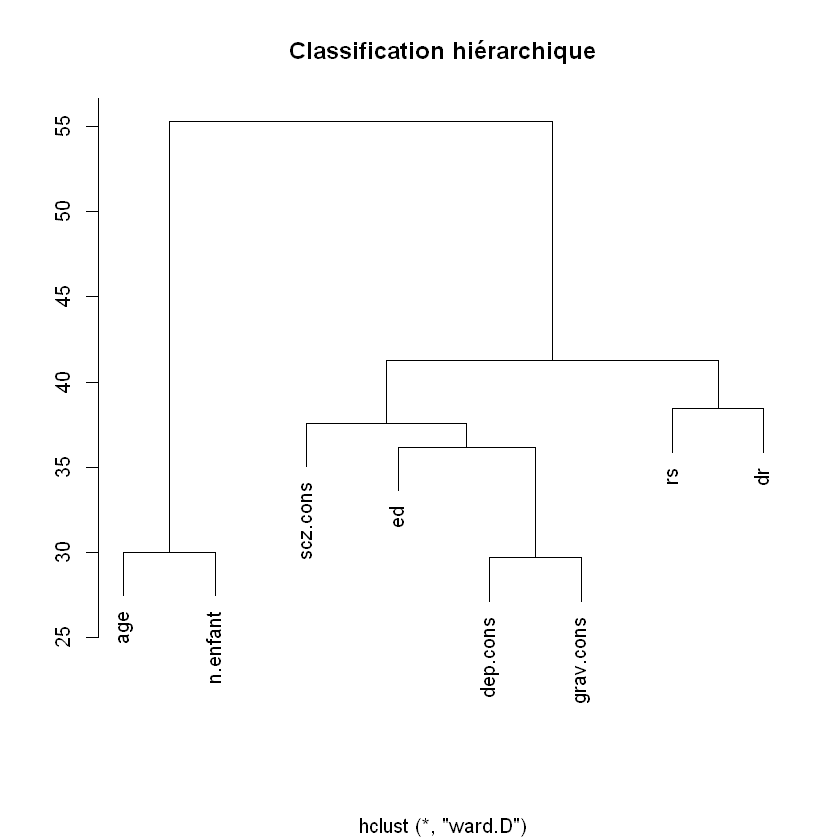

In [20]:
plot(cha, xlab='', ylab='', main='Classification hiérarchique')